**[Time Series With Siraj Course Home Page](https://kaggle.com/learn/time-series-with-siraj)**

---

# The Challenge
Can you improve the model by modifying Siraj's code in steps 2 and 3 below?

You can try adding layers, adjusting dropout, changing the optimization strategy. Get creative!

# Step 0
Run the cell below to load some utility functions. Feel free not to read this cell. It's just set-up for the interesting part.

In [1]:
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.time_series_with_siraj.ex1 import *

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'r').read()
    data = f.split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]


def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

print("Setup Complete")


/Users/danbecker/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Setup Complete


# Review Data

The code cell below loads your training and test data. Do a quick overview of the data to make sure you understand it.

In [2]:
X_train, y_train, X_test, y_test = load_data('../input/sp500.csv', 50, True)

# Your exploratory data analysis code below

# Step 1: Run Siraj's Model

We have a code cell below to specify and fit Siraj's model. Run this cell without modifying it, so you can compare your results to his.

After you run his code, we'll have space for you to create your own model in Step 2.

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 3s 905us/step - loss: 0.0026 - val_loss: 7.7797e-04
Predicted path at various points in time for siraj_model


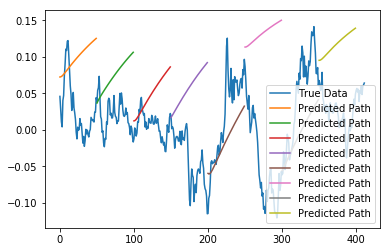

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [3]:
siraj_model = Sequential()

siraj_model.add(LSTM(
    input_shape=(None, 1),
    units=50,
    return_sequences=True))
siraj_model.add(Dropout(0.2))

siraj_model.add(LSTM(100, return_sequences=False))
siraj_model.add(Dropout(0.2))

siraj_model.add(Dense(1))
siraj_model.add(Activation('linear'))

siraj_model.compile(loss='mse', optimizer='rmsprop')


siraj_model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=1,
    validation_split=0.05)

step_1.check()

# Step 2: Create Your Model.

Create your model in the cell below. From the graphs, how does it stack up to Siraj's model?

In [4]:
my_model = Sequential()

my_model.add(LSTM(
    input_shape=(None, 1),
    units=50,
    return_sequences=True))


my_model.add(LSTM(100, return_sequences=False))
my_model.add(Dropout(0.2))

my_model.add(Dense(1))
my_model.add(Activation('linear'))

my_model.compile(loss='mse', optimizer='rmsprop')


my_model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=1,
    validation_split=0.05)

# Fill in the parameters to fit your model
my_model.fit(
    X_train,
    y_train,
    batch_size=____,   # Fill this in
    epochs=____,       # Fill this in
    validation_split=0.05)

step_2.check()

NameError: name '____' is not defined

# Keep Going

**[Continue](https://www.kaggle.com/crawford/time-series-modeling)** to learn about a bunch of techniques designed just for time series.

---

**[Time Series With Siraj Course Home Page](https://kaggle.com/learn/time-series-with-siraj)**

